In [ ]:
# Importing Libraries(Technologies)
from math import sqrt
from pandas_datareader import data 
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime as dt
from datetime import date
import urllib.request,json
import os
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#import sweetviz
from keras.models import Sequential
from keras.layers import Dense,LSTM

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [ ]:
!pip install sweetviz

In [ ]:
df=pd.read_csv('https://github.com/ajtheb/Machine-Learning-Challenges-and-Hackathons/raw/master/Lowest%20price%20hackerearth/Dataset/Train.csv')
dftest=pd.read_csv('https://github.com/ajtheb/Machine-Learning-Challenges-and-Hackathons/raw/master/Lowest%20price%20hackerearth/Dataset/Test.csv')

In [ ]:
my_report = sweetviz.analyze([dftest, "Test"])
my_report.show_html('Report.html')

In [ ]:
df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [ ]:
dftest.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
0,IT_265079,2014-01-19,0,3,0,0,0.1,5303
1,IT_265087,2014-01-19,0,268,0,2,1.4,10492
2,IT_265107,2014-01-19,0,320,0,0,13.4,24706
3,IT_265139,2014-01-19,17,358,0,3,5.5,23464
4,IT_265142,2014-01-19,18,23,5,2,0.0,6222


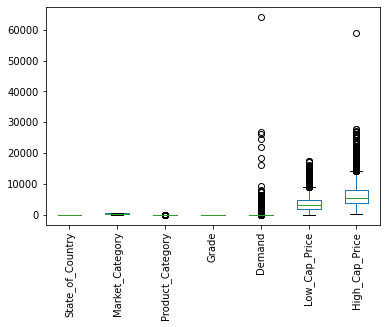

In [ ]:
df.boxplot(rot=90,grid=False)

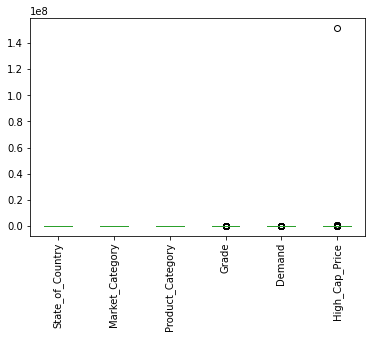

In [ ]:
dftest.boxplot(rot=90,grid=False)

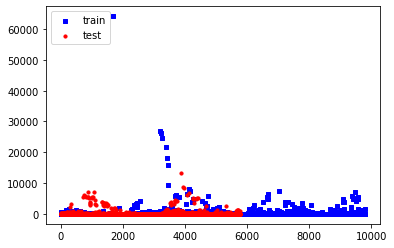

In [ ]:
import matplotlib.pyplot as plt

x = df['Demand']
y = dftest['Demand']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

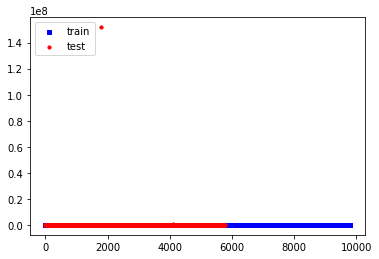

In [ ]:
import matplotlib.pyplot as plt

x = df['High_Cap_Price']
y = dftest['High_Cap_Price']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

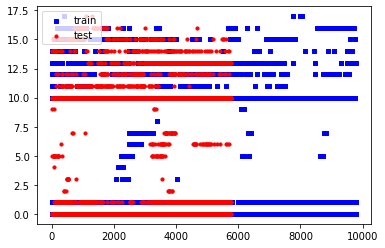

In [ ]:
import matplotlib.pyplot as plt

x = df['Product_Category']
y = dftest['Product_Category']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

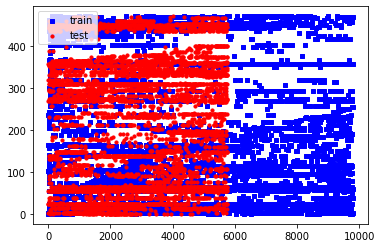

In [ ]:
import matplotlib.pyplot as plt

x = df['Market_Category']
y = dftest['Market_Category']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

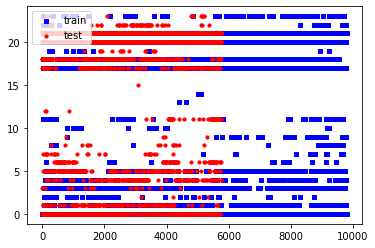

In [ ]:
import matplotlib.pyplot as plt

x = df['State_of_Country']
y = dftest['State_of_Country']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

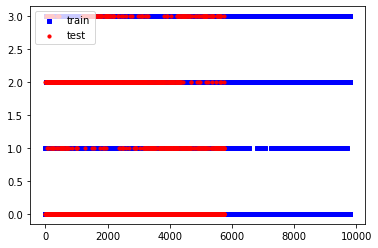

In [ ]:
import matplotlib.pyplot as plt

x = df['Grade']
y = dftest['Grade']
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(range(len(x)),x, s=10, c='b', marker="s", label='train')
ax1.scatter(range(len(y)),y, s=10, c='r', marker="o", label='test')
plt.legend(loc='upper left');
plt.show()

In [ ]:
df['Demand'].sort_values(ascending=False).head(6)

1682    64160.5
3190    26882.3
3225    26276.4
3248    24656.0
3373    21862.9
3407    18307.1
Name: Demand, dtype: float64

In [ ]:
df=df.drop(labels=[1682],axis=0)

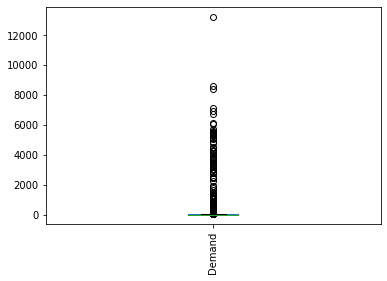

In [ ]:
dftest.boxplot(column=['Demand'],rot=90,grid=False)


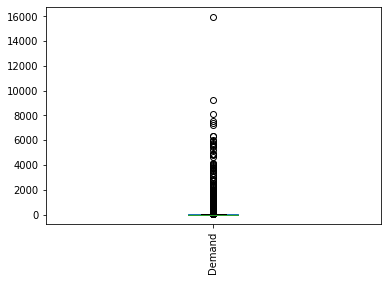

In [ ]:
df.boxplot(column=['Demand'],rot=90,grid=False)

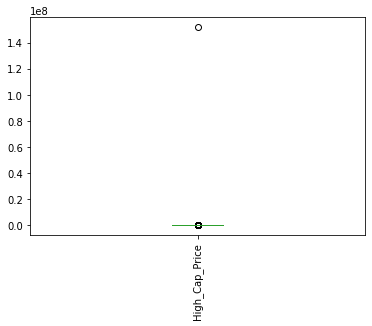

In [ ]:
dftest.boxplot(column=['High_Cap_Price'],rot=90,grid=False)

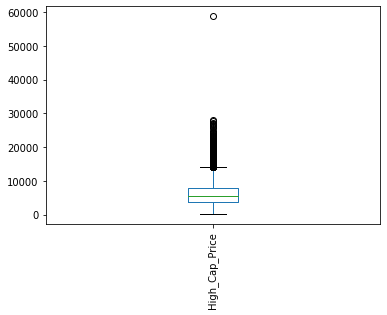

In [ ]:
df.boxplot(column=['High_Cap_Price'],rot=90,grid=False)

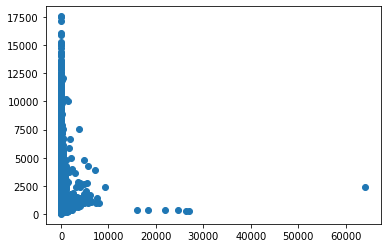

In [ ]:
plt.scatter(df['Demand'],df['Low_Cap_Price'])

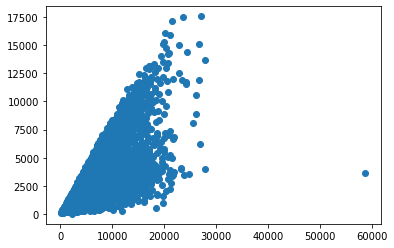

In [ ]:
plt.scatter(df['High_Cap_Price'],df['Low_Cap_Price'])

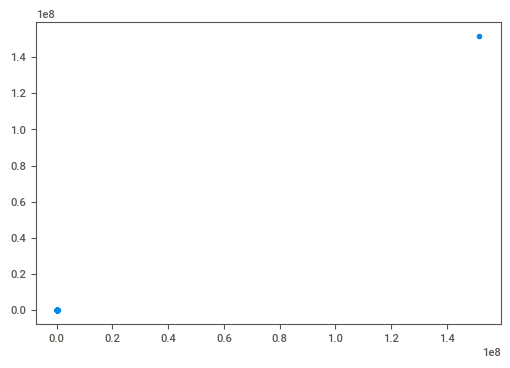

In [ ]:
plt.scatter(dftest['High_Cap_Price'],dftest['High_Cap_Price'])

In [ ]:
d=df.drop('Date',axis=1)

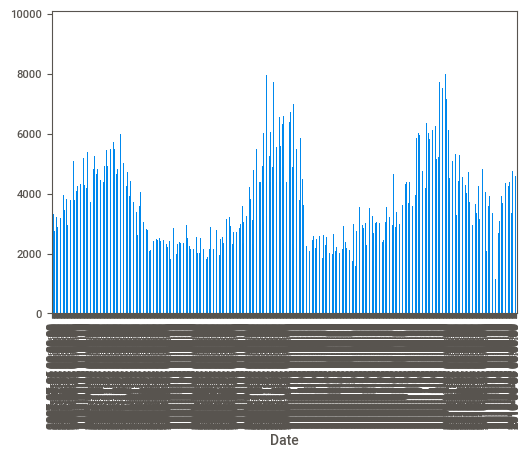

In [ ]:
df.groupby('Date')['Low_Cap_Price'].mean().plot(kind='bar')

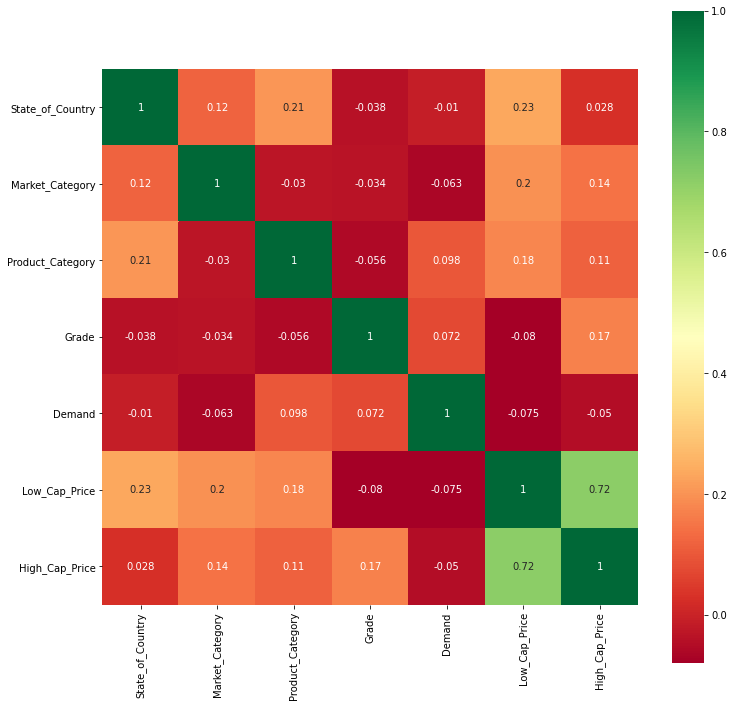

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,12))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn",square=True)

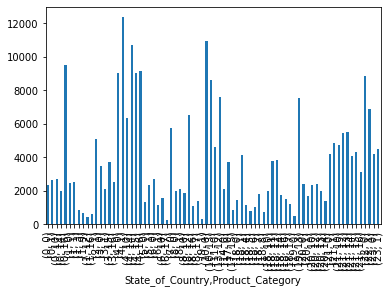

In [ ]:
df.groupby(['State_of_Country','Product_Category'])['Low_Cap_Price'].mean().plot(kind='bar')

In [ ]:
df[(s)].min(),df[(s)].max()

(Item_Id               IT_10272
 Date                2007-07-06
 State_of_Country             0
 Market_Category              0
 Product_Category             0
 Grade                        0
 Demand                       0
 Low_Cap_Price              491
 High_Cap_Price           12934
 dtype: object, Item_Id                IT_9640
 Date                2010-06-08
 State_of_Country            23
 Market_Category            465
 Product_Category            16
 Grade                        3
 Demand                  5765.9
 Low_Cap_Price            17580
 High_Cap_Price           58812
 dtype: object)

In [ ]:
d = df[~((df < (Q1 - .1 * IQR)) |(df > (Q3 + 2.1 * IQR))).any(axis=1)]
d.shape

(7056, 9)

In [ ]:
df_out.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [ ]:
df.shape

(9798, 9)

In [ ]:
df['Demand']=(df['Demand']-df['Demand'].min())/(df['Demand'].max()-df['Demand'].min())
dftest['Demand']=(dftest['Demand']-dftest['Demand'].min())/(dftest['Demand'].max()-dftest['Demand'].min())

In [ ]:
df['High_Cap_Price']=(df['High_Cap_Price']-df['High_Cap_Price'].min())/(df['High_Cap_Price'].max()-df['High_Cap_Price'].min())
dftest['High_Cap_Price']=(dftest['High_Cap_Price']-dftest['High_Cap_Price'].min())/(dftest['High_Cap_Price'].max()-dftest['High_Cap_Price'].min())

In [ ]:
dftest.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,High_Cap_Price
count,5763.000000,5763.000000,5763.000000,5763.00000,5763.000000,5763.000000
mean,15.926080,222.169356,4.547978,0.39823,67.695471,0.000246
std,8.122655,145.683245,5.485450,0.81668,486.501858,0.013172
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,11.500000,65.000000,0.000000,0.00000,0.600000,0.000048
50%,21.000000,238.000000,1.000000,0.00000,2.300000,0.000062
75%,21.000000,340.000000,10.000000,0.00000,8.400000,0.000083
max,23.000000,471.000000,17.000000,3.00000,13242.600000,1.000000


In [ ]:
df.describe()

,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.652072,71.977414,3500.273525,6349.838028
std,8.760964,169.767862,4.751807,1.032439,927.194052,2188.046803,3652.780956
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000
25%,3.000000,55.000000,0.000000,0.000000,0.500000,1863.250000,3878.250000
50%,20.000000,129.000000,0.000000,0.000000,2.000000,3124.000000,5552.500000
75%,21.000000,389.000000,1.000000,2.000000,10.175000,4667.500000,7993.750000
max,23.000000,471.000000,17.000000,3.000000,64160.500000,17580.000000,58812.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9798 entries, 0 to 9797
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           9798 non-null   object 
 1   Date              9798 non-null   object 
 2   State_of_Country  9798 non-null   int64  
 3   Market_Category   9798 non-null   int64  
 4   Product_Category  9798 non-null   int64  
 5   Grade             9798 non-null   int64  
 6   Demand            9798 non-null   float64
 7   Low_Cap_Price     9798 non-null   int64  
 8   High_Cap_Price    9798 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 689.0+ KB


In [ ]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5763 entries, 0 to 5762
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Item_Id           5763 non-null   object 
 1   Date              5763 non-null   object 
 2   State_of_Country  5763 non-null   int64  
 3   Market_Category   5763 non-null   int64  
 4   Product_Category  5763 non-null   int64  
 5   Grade             5763 non-null   int64  
 6   Demand            5763 non-null   float64
 7   High_Cap_Price    5763 non-null   int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 360.3+ KB


In [ ]:
df.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [ ]:
dftest.isnull().sum()

Item_Id             0
Date                0
State_of_Country    0
Market_Category     0
Product_Category    0
Grade               0
Demand              0
Low_Cap_Price       0
High_Cap_Price      0
dtype: int64

In [ ]:
df.describe()

,State_of_Country,Market_Category,Product_Category,Demand,Low_Cap_Price,High_Cap_Price,month,day,year,weekday,quarter,grade_coded,is_weekend
count,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000,9798.000000
mean,14.278730,198.414064,2.492958,0.001122,3500.273525,6349.838028,6.051439,15.560523,2008.292202,3.175954,2.363135,1.630639,0.334252
std,8.760964,169.767862,4.751807,0.014451,2188.046803,3652.780956,3.306099,8.680330,0.938576,2.076535,1.091130,0.835585,0.471752
min,0.000000,0.000000,0.000000,0.000000,1.000000,163.000000,1.000000,1.000000,2007.000000,0.000000,1.000000,0.000000,0.000000
25%,3.000000,55.000000,0.000000,0.000008,1863.250000,3878.250000,3.000000,8.000000,2008.000000,1.000000,1.000000,1.000000,0.000000
50%,20.000000,129.000000,0.000000,0.000031,3124.000000,5552.500000,6.000000,15.000000,2008.000000,3.000000,2.000000,2.000000,0.000000
75%,21.000000,389.000000,1.000000,0.000159,4667.500000,7993.750000,9.000000,23.000000,2009.000000,5.000000,3.000000,2.000000,1.000000
max,23.000000,471.000000,17.000000,1.000000,17580.000000,58812.000000,12.000000,31.000000,2010.000000,6.000000,4.000000,3.000000,1.000000


In [ ]:
df['Date']=pd.to_datetime(df['Date'])
dftest['Date']=pd.to_datetime(dftest['Date'])

In [ ]:
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day
df['year']=pd.DatetimeIndex(df['Date']).year
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [ ]:
dftest['month']=pd.DatetimeIndex(dftest['Date']).month
dftest['day']=pd.DatetimeIndex(dftest['Date']).day
dftest['year']=pd.DatetimeIndex(dftest['Date']).year
dftest['weekday']=pd.DatetimeIndex(dftest['Date']).weekday

In [ ]:
df['day_m_y']=df['day']*df['month']*df['year']
dftest['day_m_y']=dftest['day']*dftest['month']*dftest['year']

In [ ]:
df['weekday'].unique()

array([3, 4, 5, 6, 0, 1, 2])

In [ ]:
df.groupby('weekday')['Low_Cap_Price'].mean().sort_values()

weekday
4    3118.697796
3    3132.283922
2    3134.856905
1    3165.960674
0    3174.733879
6    3187.624060
5    3224.113244
Name: Low_Cap_Price, dtype: float64

In [ ]:
df['quarter'] = df['Date'].dt.quarter
dftest['quarter'] = dftest['Date'].dt.quarter

In [ ]:
df['weekofyear'] = df['Date'].dt.weekofyear
dftest['weekofyear'] = df['Date'].dt.weekofyear

In [ ]:
df['dayofyear'] = df['Date'].dt.dayofyear
dftest['dayofyear'] = df['Date'].dt.dayofyear

In [ ]:
df.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price,month,day,year,weekday,quarter,is_weekend
0,IT_1,2007-07-05,0,0,0,0,0.000008,2785,0.069515,7,5,2007,3,3,0
1,IT_2,2007-07-05,0,1,0,0,0.000011,3574,0.078313,7,5,2007,3,3,0
2,IT_3,2007-07-05,0,103,0,1,0.000025,5978,0.162083,7,5,2007,3,3,0
3,IT_4,2007-07-05,0,103,0,0,0.000000,5681,0.138962,7,5,2007,3,3,0
4,IT_5,2007-07-05,0,103,0,2,0.000000,4924,0.120957,7,5,2007,3,3,0


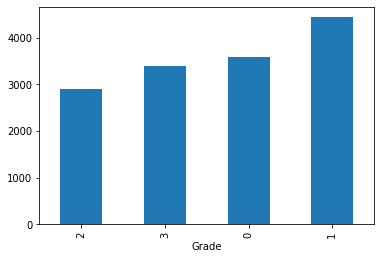

In [ ]:
df.groupby('Grade')['Low_Cap_Price'].mean().sort_values().plot(kind='bar')

In [ ]:
pre={
      2:0,
      3:1,
      0:2,
      1:3
}
df['grade_coded']=df['Grade'].map(pre)
dftest['grade_coded']=dftest['Grade'].map(pre)

In [ ]:
df=df.drop('Grade',axis=1)
dftest=dftest.drop('Grade',axis=1)

In [ ]:
df['Demand*grade']=((df['Demand']-df['Demand'].min())/(df['Demand'].max()-df['Demand'].min()))*((df['grade_coded']-df['grade_coded'].min())/(df['grade_coded'].max()-df['grade_coded'].min()))
dftest['Demand*grade']=((dftest['Demand']-dftest['Demand'].min())/(dftest['Demand'].max()-dftest['Demand'].min()))*((dftest['grade_coded']-dftest['grade_coded'].min())/(dftest['grade_coded'].max()-dftest['grade_coded'].min()))

In [ ]:
ordinal=['State_of_Country','Market_Category','Product_Category']

In [ ]:
for f in ordinal:
  s=df.groupby(f)['Low_Cap_Price'].mean().sort_values()
  pre={}
  x=0
  for rownum,(indx,val) in enumerate(s.iteritems()):
    pre[indx]=x
    x+=1
  df[f+'coded']=df[f].map(pre)
  dftest[f+'coded']=dftest[f].map(pre)
  df=df.drop(columns=[f],axis=1)
  dftest=dftest.drop(columns=[f],axis=1)


In [ ]:
#ddf['prod_quarter']=df['Product_Categorycoded']*df['quarter']
df['prod_quar']=((df['Product_Categorycoded']-df['Product_Categorycoded'].min())/(df['Product_Categorycoded'].max()-df['Product_Categorycoded'].min()))*((df['quarter']-df['quarter'].min())/(df['quarter'].max()-df['quarter'].min()))
dftest['prod_quar']=((dftest['Product_Categorycoded']-dftest['Product_Categorycoded'].min())/(dftest['Product_Categorycoded'].max()-dftest['Product_Categorycoded'].min()))*((dftest['quarter']-dftest['quarter'].min())/(dftest['quarter'].max()-dftest['quarter'].min()))

In [ ]:
df=df.drop('prod_quarter',axis=1)

In [ ]:
df.head()

,Item_Id,Date,Demand,Low_Cap_Price,High_Cap_Price,month,day,year,weekday,day_m_y,quarter,is_weekend,weekofyear,dayofyear,grade_coded,Market_product,State_of_Countrycoded,Market_Categorycoded,Product_Categorycoded,prod_quar
0,IT_1,2007-07-05,0.5,2785,4240,7,5,2007,3,70245,3,0,27,186,2,0.464188,7,185,11,0.458333
1,IT_2,2007-07-05,0.7,3574,4756,7,5,2007,3,70245,3,0,27,186,2,0.198221,7,79,11,0.458333
2,IT_3,2007-07-05,1.6,5978,9669,7,5,2007,3,70245,3,0,27,186,3,0.649863,7,259,11,0.458333
3,IT_4,2007-07-05,0.0,5681,8313,7,5,2007,3,70245,3,0,27,186,2,0.649863,7,259,11,0.458333
4,IT_5,2007-07-05,0.0,4924,7257,7,5,2007,3,70245,3,0,27,186,0,0.649863,7,259,11,0.458333


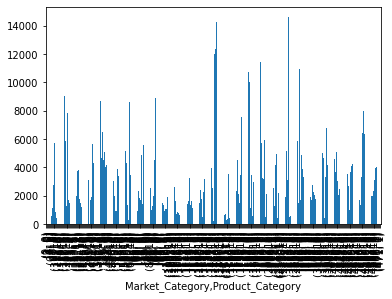

In [ ]:
df.groupby(['Market_Category','Product_Category'])['Low_Cap_Price'].mean().plot(kind='bar')

In [ ]:
#df['Market_product']=df['Market_Category']*df['Product_Category']
df['Market_product']=((df['Product_Categorycoded']-df['Product_Categorycoded'].min())/(df['Product_Categorycoded'].max()-df['Product_Categorycoded'].min()))*((df['Market_Categorycoded']-df['Market_Categorycoded'].min())/(df['Market_Categorycoded'].max()-df['Market_Categorycoded'].min()))
dftest['Market_product']=((dftest['Product_Categorycoded']-dftest['Product_Categorycoded'].min())/(dftest['Product_Categorycoded'].max()-dftest['Product_Categorycoded'].min()))*((dftest['Market_Categorycoded']-dftest['Market_Categorycoded'].min())/(dftest['Market_Categorycoded'].max()-dftest['Market_Categorycoded'].min()))

In [ ]:
df=df.drop('Demand*grade',axis=1)

In [ ]:
df['State_Prod']=df['State_of_Countrycoded']-df['Product_Categorycoded']
dftest['State_Prod']=dftest['State_of_Countrycoded']-dftest['Product_Categorycoded']

In [ ]:
pearsoncorr = df.corr(method='pearson')
abs(pearsoncorr['Low_Cap_Price']).sort_values(ascending=False)

Low_Cap_Price            1.000000
High_Cap_Price           0.721043
Market_Categorycoded     0.670626
Market_product           0.658103
State_of_Countrycoded    0.521986
State_Prod               0.412178
prod_quar                0.297339
quarter                  0.281544
month                    0.281492
dayofyear                0.280633
weekofyear               0.278556
Product_Categorycoded    0.234851
day_m_y                  0.192937
grade_coded              0.149656
Grade                    0.079673
Demand                   0.075458
Demand*grade             0.040170
day                      0.014953
weekday                  0.006180
year                     0.001868
Name: Low_Cap_Price, dtype: float64

In [ ]:
X=df.drop(columns=['Low_Cap_Price','Item_Id','Date','day','month','weekday','grade_coded','day_m_y','prod_quar','Grade','year'],axis=1)
y=df['Low_Cap_Price'].values

In [ ]:
Datatest=dftest.drop(columns=['Item_Id','Date','day','month','weekday','grade_coded','day_m_y','prod_quar','Grade','year'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [ ]:
xgbr=xgb.XGBRegressor()

In [ ]:
xgbr.fit(X_train,y_train)
y=xgbr.predict(X_test)
y=abs(y)
from sklearn.metrics import mean_squared_log_error
print('RMSLE:', 100-mean_squared_log_error(y_test, y))

[16:07:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 99.90272261502577


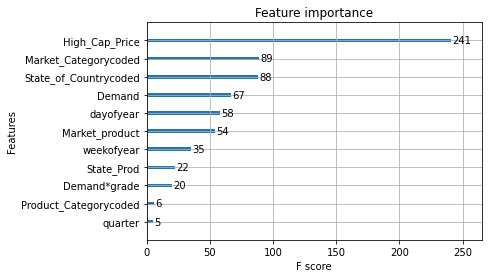

In [ ]:
from xgboost import plot_importance
plot_importance(xgbr)

Light GBM

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

param = {'objective': 'regression',
         'num_leaves':20,
         'boosting': 'gbdt',  
         'metric': 'mae',
         'learning_rate': 0.2, 
         'num_iterations': 1000,
         'num_leaves': 80,
         'max_depth': 6,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.80,
         'bagging_freq': 1,
         'bagging_seed': 142,
         'feature_fraction': 0.80,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 250
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_test)
y_pred_lgbm=abs(y_pred_lgbm)
#print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))
from sklearn.metrics import mean_squared_log_error
print('RMSLE:', 100-mean_squared_log_error(y_test, y_pred_lgbm))


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 200 rounds.
[100]	valid_0's l1: 456.43
[200]	valid_0's l1: 455.782
[300]	valid_0's l1: 459.785
Early stopping, best iteration is:
[132]	valid_0's l1: 455.049
RMSLE: 99.92620006666732


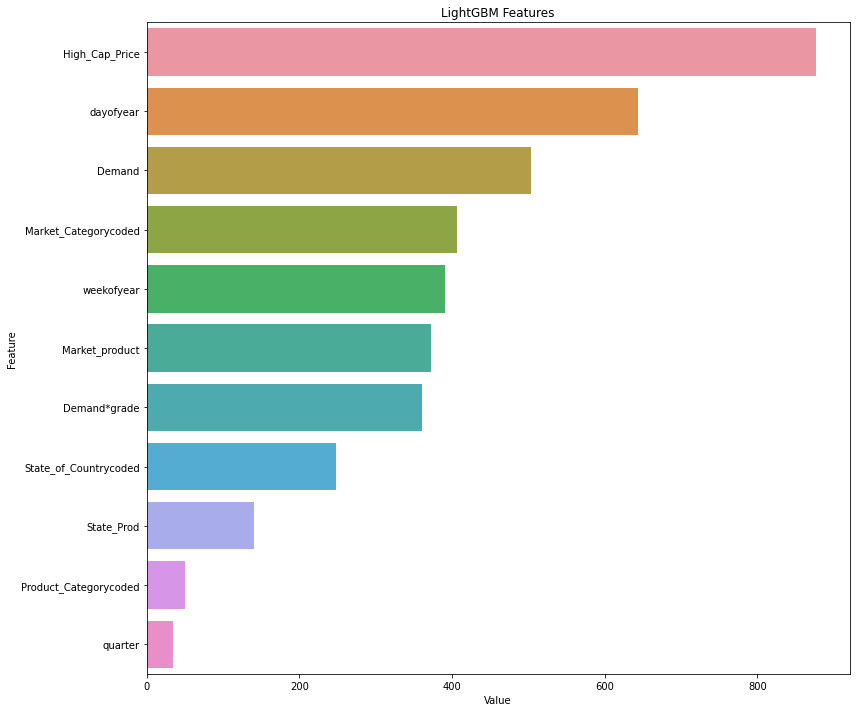

In [ ]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:50], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:

Xtest = Datatest

In [ ]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=
             10, shuffle=True, random_state=101)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(boosting_type='gbdt', num_leaves=500, max_depth=31, learning_rate=0.1, n_estimators=1000, min_child_samples=20, subsample=0.80)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=100)

    y_pred_lgbm = lgbm.predict(X_test)
    y_pred_lgbm=abs(y_pred_lgbm)
    #print('RMSLE:', sqrt(mean_absolute_error(np.expm1(y_cv), np.expm1(y_pred_lgbm))))
    from sklearn.metrics import mean_squared_log_error
    print('RMSLE:', 100-mean_squared_log_error(y_test, y_pred_lgbm))

    errlgb.append(sqrt(mean_absolute_error(y_test, y_pred_lgbm)))
    p = lgbm.predict(Datatest)
    y_pred_totlgb.append(p)

XG Boost

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [ ]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20] ,
 "max_depth"        : [ 3,4,5,6,8,10,13,15],
 "min_child_weight" : [  3,5, 6,9 ,11,14,19],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ,0.5],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7,0.9 ],
 "num_boost_round": [10, 25, 50,80,100,150],
  "n_estimators" :[50,100,200,300,500] 
}

In [ ]:
# Hyper Parameter Optimization

param={
  "learning_rate": 0.01,
  "n_estimators": 100, 
  "max_depth": 3,
  "subsample": 0.8,
  "colsample_bytree": 1,
  "gamma": 1 
}

In [ ]:
xg_reg = xgb.XGBRegressor()

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xg_reg,param_distributions=params,n_iter=5,n_jobs=1,cv=4,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 4 folds for each of 5 candidates, totalling 20 fits
[CV] num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9 
[15:44:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, score=0.858, total=   2.8s
[CV] num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9 
[15:44:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, score=0.890, total=   2.8s
[CV] num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9 
[15:44:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.6s remaining:    0.0s


[CV]  num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, score=0.864, total=   2.9s
[CV] num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9 
[15:44:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  num_boost_round=80, n_estimators=300, min_child_weight=19, max_depth=13, learning_rate=0.2, gamma=0.3, colsample_bytree=0.9, score=0.868, total=   2.9s
[CV] num_boost_round=10, n_estimators=200, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3 
[15:44:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  num_boost_round=10, n_estimators=200, min_child_weight=3, max_depth=6, learning_rate=0.15, gamma=0.4, colsample_bytree=0.3, score=0.858, total=   0.7s
[CV] num_boost

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   26.8s finished



 Time taken: 0 hours 0 minutes and 27.7 seconds.


In [ ]:
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 14,
 'n_estimators': 100,
 'num_boost_round': 25}

In [ ]:
random_search.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=11, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_boost_round=100,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [ ]:
(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0.4,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=3, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, num_boost_round=150,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [ ]:
random_search.best_score_

0.87561123055319

In [ ]:
xgbr=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=15, min_child_weight=11, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, num_boost_round=100,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBRegressor(), 
 param_grid = param_test1,n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.best_params_, gsearch1.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:45:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 9, 'min_child_weight': 5}, 0.8757049416857658)

In [ ]:
param_test2 = {
 'max_depth':[8,9,10],
 'min_child_weight':[4,5,6]
}
gsearch2 = GridSearchCV(estimator = xgb.XGBRegressor(), 
param_grid = param_test2,n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.best_params_, gsearch2.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:46:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'max_depth': 8, 'min_child_weight': 5}, 0.8771554744897427)

In [ ]:
param_test2b = {
 'min_child_weight':[6,7,8,9]
}
gsearch2b = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=8), 
 param_grid = param_test2b,n_jobs=4,iid=False, cv=5)
gsearch2b.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:47:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=8,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid=False, n_jobs=4, param_grid={'min_child_weight': [6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scorin

In [ ]:
gsearch2b.best_params_, gsearch2b.best_score_


({'min_child_weight': 6}, 0.8770623027510143)

In [ ]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=8,min_child_weight=5), 
 param_grid = param_test3,n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.best_params_, gsearch3.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:48:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'gamma': 0.0}, 0.8771554744897427)

In [ ]:
max_depth=8
mmin_child_weight=5
gamma=0.0

In [ ]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=8,min_child_weight=5), 
 param_grid = param_test4, n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.best_params_, gsearch4.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:50:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.9, 'subsample': 0.8}, 0.8794654658519081)

In [ ]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,100,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)]
}
gsearch5 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=9,min_child_weight=6), 
 param_grid = param_test5, n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.best_params_, gsearch5.best_score_


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:51:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'colsample_bytree': 0.85, 'subsample': 0.85}, 0.8788863191319815)

In [ ]:
param_test6 = {
 'reg_alpha':[0.01,0.05,0.02,0.001]
}
gsearch6 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=8,min_child_weight=5,colsample_bytree=0.9,subsample=0.8), 
 param_grid = param_test6,n_jobs=4,iid=False, cv=5)
gsearch6.fit(X_train,y_train)
gsearch6.best_params_, gsearch6.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[15:52:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


({'reg_alpha': 0.05}, 0.8797588097182854)

In [ ]:
param_test7 = {
 'n_estimators':[100,500,1000,1500,2000]
}
gsearch7 = GridSearchCV(estimator = xgb.XGBRegressor(max_depth=9,min_child_weight=6,colsample_bytree=0.85,subsample=0.95), 
 param_grid = param_test7,n_jobs=4,iid=False, cv=5)
gsearch7.fit(X_train,y_train)
gsearch7.best_params_, gsearch7.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


[09:33:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [ ]:
xgbr= xgb.XGBRegressor(max_depth=8,min_child_weight=5,colsample_bytree=0.9,subsample=0.8,reg_alpha=0.05)

In [ ]:
xgbr=xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.2,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=4, min_child_weight=5, missing=None, n_estimators=200,
             n_jobs=1, nthread=None, num_boost_round=25, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
y=abs(y)

In [ ]:
xgbr.fit(X_train,y_train)
y=xgbr.predict(X_test)
#y=abs(y)
from sklearn.metrics import mean_squared_error
print('RMSLE:', sqrt(mean_squared_error(y_test, y)))

[16:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE: 787.2574537446001


In [ ]:
from sklearn.metrics import mean_squared_log_error
print('RMSLE:', 100-mean_squared_log_error(y_test, y))

RMSLE: 99.91328933657921


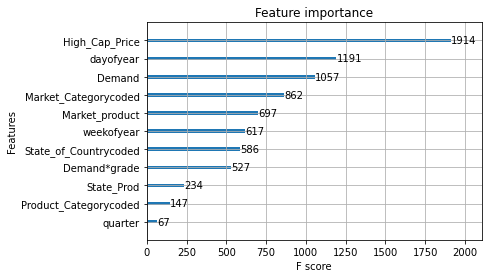

In [ ]:
from xgboost import plot_importance
plot_importance(xgbr)

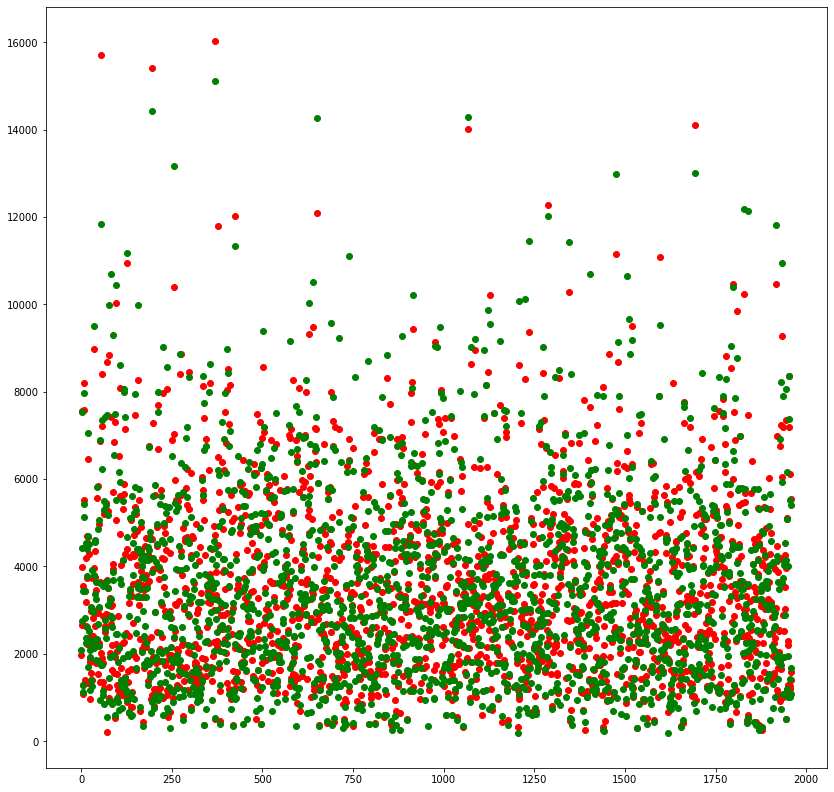

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(14,14))
plt.scatter(range(len(y)),y,label='predicted',c='r')
plt.scatter(range(len(y_test)),y_test,label='Actual',c='g')

In [ ]:
u=0
for x in y:
  if x<0:
    print(u)
  u+=1

In [ ]:
y_test[965]

261

In [ ]:
y[295]

772.9155

In [ ]:
X_test.iloc[965,:]

State_of_Country       6.0
Market_Category      216.0
Product_Category      17.0
Demand                 0.0
High_Cap_Price       488.0
month                  8.0
day                    6.0
year                2009.0
weekday                3.0
quarter                3.0
is_weekend             0.0
grade_coded            2.0
Name: 7776, dtype: float64

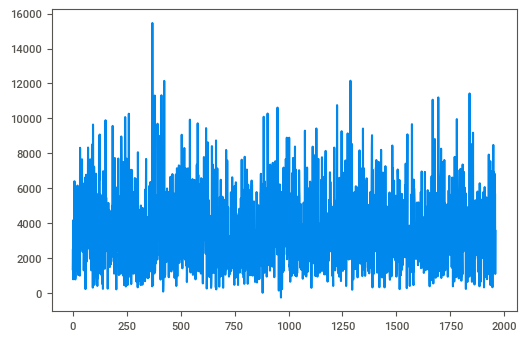

In [ ]:
p
plt.show()


In [ ]:
y=abs(y)

In [ ]:
X_train.columns

Index(['Demand', 'High_Cap_Price', 'month', 'day', 'year', 'weekday',
       'day_m_y', 'quarter', 'is_weekend', 'weekofyear', 'dayofyear',
       'grade_coded', 'Market_product', 'State_of_Countrycoded',
       'Market_Categorycoded', 'Product_Categorycoded', 'prod_quar'],
      dtype='object')

In [ ]:
Datatest = Datatest.reindex(columns= X_train.columns.to_list())

In [ ]:
out=xgbr.predict(Datatest)

In [ ]:
u=0
for x in out:
  if x<0:
    print(u)
    out[u]=0
  u+=1

In [ ]:
out[740]=np.mean(out)

In [ ]:
out[2755]=np.mean(out)
#out[5632]=np.mean(out)

In [ ]:
np.where(dftest['High_Cap_Price']==1)

(array([3127]),)

In [ ]:
out=abs(out)

In [ ]:
dataf=pd.DataFrame({
    'Item_Id':dftest['Item_Id'],
    'Low_Cap_Price':out
})

In [ ]:
dataf.to_csv('lowest_price_sub.csv',index=False)